<a href="https://colab.research.google.com/github/Prospkt/neural_net_stuff/blob/main/ID2_classificao_multiclasse_case_iris_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Principais diferencas de classificacao Binaria que foram feitas ( diabete e derramamento)
#1 - tem mais de 3 saidas
#2 - neste caso as saidas estao em nome

In [40]:
#escolhendo bibliotecas do collab
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder  # NEW! lidar com transformacao de palavras ( saidas nome iris)
from keras.utils import np_utils  #NEW! com transformacao de palavras ( saidas nome iris)


In [41]:
dados = read_csv('/content/irisflower (1).data', sep=",")
dados

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
X = dados.values[:,0:4]
y = dados.values[:,4]


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

In [43]:
#Lidando com erro de float 
X = X.astype('float32') #NEW! Para evitar um erro de float que ocorria embaixo

In [44]:
#NEW! Lidando com a questao das saidas serem palavras 
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
#converter os nomes das flores em numero
y2 = np_utils.to_categorical(encoded_Y)
y2 #aqui pode ver que as palavras foram transformadas e chama y2

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [46]:
# Geracao dos arquivos de treino, teste e validacao
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20) # NEW! lembrando que aqui tem que mudar para y2

In [47]:
# Geracao do modelo 
model = Sequential()
model.add(Dense(100, activation= 'tanh', kernel_initializer= 'he_normal', input_shape=(4,))) #5 colunas-1=4
model.add(Dense(80, activation = 'relu'))
model.add(Dense(3, activation= 'softmax'))  #NEW! Multiclasse A SAIDA AGORA SAO 3, assim nao se usa a sigmoid e sim a SOFTMAX > 2saidas

In [48]:
# Compilacao do modelo 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy']) # NEW!muda a funcao de perda para categorical em vez de binary


In [49]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
4/4 [==============================] - 1s 119ms/step - loss: 0.9180 - accuracy: 0.5516 - val_loss: 0.8120 - val_accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6959 - accuracy: 0.7035 - val_loss: 0.7011 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.5657 - accuracy: 0.7257 - val_loss: 0.5466 - val_accuracy: 0.9667
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.4658 - accuracy: 0.9546 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.3938 - accuracy: 0.8904 - val_loss: 0.4439 - val_accuracy: 0.9000
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.3846 - accuracy: 0.9624 - val_loss: 0.4254 - val_accuracy: 0.8667
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.3524 - accuracy: 0.9047 - val_loss: 0.3861 - val_accuracy: 0.9000
Epoch 8/50
4/4 [==========

<function matplotlib.pyplot.legend>

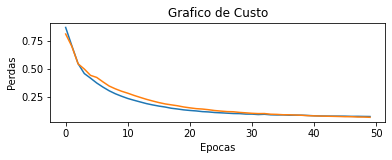

In [50]:
#GRAFICO - plot loss durante treinamenti=o
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'], label= 'Perdas durante os Treinamentos')
plt.plot(history.history['val_loss'], label= 'Perdas durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend

<function matplotlib.pyplot.legend>

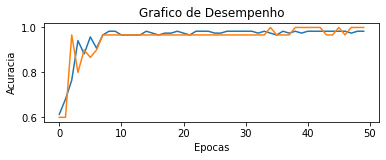

In [51]:
#GRAFICO - plot accuracy durante treinament-
plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'], label= 'Acuracia durante os Testes')
plt.plot(history.history['val_accuracy'], label= 'Acuracia durante os Testes')
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend